# 3. word2vec

In [1]:
from IPython.display import Image

# 3.1 추론 기반 기법과 신경망
- 원래 프로그램이나 도구를 가리키는데 사용된 용어
- 문맥에 따라서 신경망을 가리키는 경우도 많음
- 통계기반 기법 : 데이터가 굉장히 많을 때 현실적으로 불가능
- 추론기반 기법 : 맥락이 주어졌을 때 어떤 단어가 들어가는지 추측하는 기법

# ※ Onehot Encoding
- 특정단어를 고정길이의 벡터로 변환
- 특정단어의 인덱스는 1이고 나머지는 0인 벡터

In [2]:
# 필요한 패키지 import

import numpy as np

In [3]:
# 단어 you를 원핫 인코딩 된한 값을 input값으로 받아서 
# 완전연결계층에 의해 변환하는 코드 생성

c=np.array([[1,0,0,0,0,0,0]]) # onehot encoding을 적용한 input
W=np.random.randn(7,3)  # 가중치, 7X3행렬
h=np.matmul(c,W)   # 중간 노드, 행렬곱
''' 
np.dot과 np.matmul은 2차원 행렬곱에서는 같은 기능이지만 
고차원배열이나 텐서 곱셈에서는 다른 기능을 다룬다
'''
print(h)

[[-0.79316118 -0.34962335  0.23544058]]


In [4]:
# 필요 패키지 import

import sys
sys.path.append('..')
import numpy as np
'''
밑바닥~2의 github 파일 참조
'''
from common.layers import MatMul

In [5]:
# 앞에서 구현한 MatMul class로 수행

c=np.array([[1,0,0,0,0,0,0]])  # onehot encoding을 적용한 input
W=np.random.randn(7,3)  # 가중치
layer=MatMul(W)  # 행렬곱
h=layer.forward(c)  # 순전파
print(h)

[[ 1.05919253 -0.82888758  0.59707352]]


# 3.2 wrod2vec - CBOW
- 맥락으로부터 타킷을 추측하는 용도의 신경망
- 타깃 : 중앙단어, 맥락 : 타깃의 주변 단어


- 은닉층은 완전연결계층(conv)에 의해 변환됨
- 입력층이 어러개라면 평균하면 됨 ex) 1번째 입력층 h1, 두번째 입력층 h2 -> 은닉층 뉴런 (h1+h2)/2
- 출력층의 뉴런 각각은 각각의 단어에 대응하며 단어의 점수를 뜻함 


- 완전연결계층의 가중치 Win은 7x3 행렬
- 가중치 Win은 단어 분산 표현의 정체
- 각행에 해당 단어의 분산 표연이 담겨있음
- 맥락에서 출현하는 단어를 잘 추축하는 방향으로 분산표현들이 갱신
- 즉, word2vec의 전체 그림

In [6]:
# 패키지 import

import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

In [7]:
# CBOW 모델 추론

# 샘플 맥락 데이터
c0=np.array([[1,0,0,0,0,0,0]]) # 첫번째 입력층
c1=np.array([[0,0,1,0,0,0,0]]) # 두번째 입력층

# 가중치 초기화
W_in=np.random.randn(7,3)  # 7X3 행렬
W_out=np.random.randn(3,7) # 3X7 행렬

# 계층 생성
in_layer0=MatMul(W_in) # 첫번째 matmul 계층
in_layer1=MatMul(W_in) # 두번째 matmul 계층
out_layer=MatMul(W_out) # 출력층의 matmul 계층

# 순전파
h0=in_layer0.forward(c0) # 첫번째 계층 순전파
h1=in_layer1.forward(c1) # 두번째 계층 순전파
h=0.5*(h0+h1) # 두개의 입력층의 평균
s=out_layer.forward(h) # 각 단어의 점수 구함

print(s)

[[ 1.01733923 -1.02941503  3.98254309 -0.62603361  3.7042974  -2.36038462
   1.35481865]]


sotfmax 함수를 적용한 CBOW 신경망
- 확률을 나타내는 뉴런들 중 정답에 해당하는 뉴런의 값이 클 것이라고 기대

# 3.3 ward2vec 예제
- 맥락과 타깃

In [8]:
# 패키지 import

import sys
sys.path.append('..')
import common.util as ut

In [9]:
text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [10]:
# 맥락과 타깃을 반환하는 함수

def create_contexts_target(corpus,window_size=1):
    target=corpus[window_size:-window_size] # 0번째와 -1번째는 맥락이 하나밖에 없으므로 타깃에서 제외
    contexts=[]
    
    for i in range(window_size,len(corpus)-window_size): # 0번째와 -1번째는 맥락이 하나밖에 없으므로 타깃에서 제외
        cs=[]
        for t in range(-window_size,window_size+1): # 타깃의 주변 단어 인덱스를 출력
            if t==0: # t가 0인경우 
                continue # 그냥 지나감
            cs.append(corpus[i+t]) # [0번째 맥락 인덱스, 1번째 맥락의 인덱스]
        contexts.append(cs) 
        
    return np.array(contexts), np.array(target)

In [11]:
# 위의 함수를 window_size가 1인 경우로 고정하여 풀어놓은 코드

print(corpus)
print()
tar=corpus[1:-1]
con=[]
for i in range(1,len(corpus)-1): # 1,2,3,4,5,6
    print('i: ',i)
    cc=[]  
    for j in range(-1,2): # -1,0,1
        if j == 0:
            continue
        print('j: ',j)
        cc.append(corpus[i+j])
        print('cc: ',cc)
    con.append(cc)
    print()
print('con: ',con)

[0 1 2 3 4 1 5 6]

i:  1
j:  -1
cc:  [0]
j:  1
cc:  [0, 2]

i:  2
j:  -1
cc:  [1]
j:  1
cc:  [1, 3]

i:  3
j:  -1
cc:  [2]
j:  1
cc:  [2, 4]

i:  4
j:  -1
cc:  [3]
j:  1
cc:  [3, 1]

i:  5
j:  -1
cc:  [4]
j:  1
cc:  [4, 5]

i:  6
j:  -1
cc:  [1]
j:  1
cc:  [1, 6]

con:  [[0, 2], [1, 3], [2, 4], [3, 1], [4, 5], [1, 6]]


In [12]:
contexts,target=create_contexts_target(corpus,window_size=1)
print(contexts)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


# ※ 맥락과 타깃을 원핫표현으로 변환

In [13]:
# 패키지 import

import sys
sys.path.append('..')
import common.util as ut

In [14]:
# 맥락, 타깃을 onehot encoding

text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)

# 맥락과 타깃으로 변환
contexts,target=ut.create_contexts_target(corpus,window_size=1)

vocab_size=len(word_to_id)

# 원핫 인코딩
target=ut.convert_one_hot(target,vocab_size)
contexts=ut.convert_one_hot(contexts,vocab_size)

print(target)
print(contexts)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


# 3.4 CBOW 모델 구현

In [15]:
# 패키지 import

import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [16]:
# 클래스 생성

class SimpleCBOW:
    def __init__(self,vocab_size,hidden_size):
        V,H=vocab_size,hidden_size
        
        # 가중치 초기화
        W_in=0.01*np.random.randn(V,H).asytpe('f') # 32bit 부동소수점 타입으로 변환
        W_out=0.01*np.random.randn(H,V).asytpe('f') # 32bit 부동소수점 타입으로 변환
        
        # 계층 생성
        self.in_layer0=MatMul(W_in)
        self.in_layer1=MatMul(W_in)
        self.out_layer0=MatMul(W_out)
        self.loss_layer0=SoftmaxWithLoss()
        
        # 모든 가중치, 기울기를 리스트에 append
        layers=[self.in_layer0,self.in_layer1,self.out_layer0]
        self.params,self.grads=[],[]
        for i in layers:
            self.parmas+=layer.paramas  # 가중치
            self.grads+=layer.grads   # 기울기
            
        # 인스턴스 변수에 단어의 분산 표현 저장
        self.word_vecs=W_in
    
    # 순전파
    def forward(self,contexts,target):
        h0=self.in_layer0.forward(contexts[:,0])
        h1=self.in_layer1.forward(contexts[:,1])
        h=0.5*(h0+h1)
        score=self.out_layer.forward(h) # 결과값 추출
        loss=self.loss_layer.forward(score,target) # loss값 추출
        return loss
    
    # 역전파
    def backward(self,dout=1):
        ds=self.loss_layer.backward(dout)
        da=self.out_layer.backward(ds)
        da*=0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [17]:
# 필요 패키지 import

import sys
sys.path.append('..')
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
import common.util as ut

In [18]:
# CBOW 클래스 확인

window_size=1
hidden_size=5
batch_size=3
max_epoch=1000

# 말뭉치 전처리
text='You say goodbye and I say hello.'
corpus,word_to_id,id_to_word=ut.preprocess(text)
vocab_size=len(word_to_id)

# 맥락, 타깃 변환
contexts,target=ut.create_contexts_target(corpus,window_size=1)

# 원핫 인코딩
target=ut.convert_one_hot(target,vocab_size)
contexts=ut.convert_one_hot(contexts,vocab_size)

# 모델 빌드
model=SimpleCBOW(vocab_size,hidden_size)
optimizer=Adam()
trainer=Trainer(model,optimizer)

# 모델 핏
trainer.fit(contexts,target,max_epoch,batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 321 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 322 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 323 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 324 |  반복 1 / 2 | 시간 0[s] | 손실 1.04
| 에폭 325 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 326 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 327 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 328 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 329 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 330 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 331 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 332 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 333 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 334 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 335 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 336 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 337 |  반복 1 / 2 | 시간 0[s] | 손실 1.03
| 에폭 338 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 339 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 340 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 341 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 342 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 343 |  반복 1

| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 658 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 659 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 661 |  반복 1

| 에폭 965 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 966 |  반복 1 / 2 | 시간 0[s] | 손실 0.37
| 에폭 967 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 968 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 969 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 970 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 971 |  반복 1 / 2 | 시간 0[s] | 손실 0.28
| 에폭 972 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 973 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 974 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 975 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 976 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 977 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 978 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 979 |  반복 1 / 2 | 시간 0[s] | 손실 0.53
| 에폭 980 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 981 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 982 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 983 |  반복 1 / 2 | 시간 0[s] | 손실 0.33
| 에폭 984 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 985 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 986 |  반복 1 / 2 | 시간 0[s] | 손실 0.48
| 에폭 987 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 988 |  반복 1 / 2 | 시간 0[s] | 손실 0.35
| 에폭 989 |  반복 1

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current fon

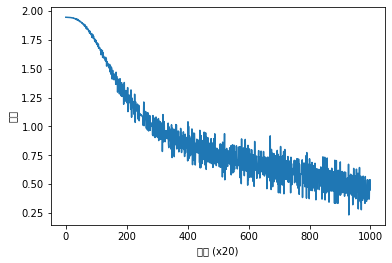

In [19]:
# 시각화

trainer.plot()

In [20]:
# MatMul 계층에서의 가중치 

word_vecs=model.word_vecs # 인스턴스 변수 word_vecs에 가중치가 저장되어 있음
for i,j in id_to_word.items():
    print(j,word_vecs[i])

you [-1.511979   -1.3110641   1.0884869   1.112268    0.25300643]
say [ 1.166178   -0.04669656 -1.1016034  -1.1293485   1.1948091 ]
goodbye [-0.19072337 -0.71472853  0.9146855   0.8246168  -1.4060487 ]
and [ 0.94186604 -1.9978846  -0.7871865  -0.7180057   0.90569586]
i [-0.20841715 -0.70950574  0.89168763  0.8297837  -1.4409813 ]
hello [-1.5086911  -1.3063989   1.0808833   1.1064303   0.25302538]
. [ 1.0946175  1.6503193 -1.15667   -1.1641972  1.1708237]


# 3.5 word2vec - CBOW 보충
# ※ skip-gram 모델
- CBPW 모델의 맥락과 타겟을 역전 시킨 모델
- 하나의 단어로부터 그 주변 단어들을 예측
- skip-gram 모델 신경망 구성
- 입력층이 하나, 출력층은 맥락의 수만큼 존재
- 각 출력층에서 개별적으로 손실을 구하고 구해진 개별 손실들을 모두 더한 값이 최종 손실
- CBOW 모델보다 결과가 좋음
- 하지만 학습속도는 CBOW 보다 느림